# NLP Pipeline machine learning - US Airline Sentiment

In [1]:
# Versão do python

from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

matplotlib: 3.3.4
plotly    : 5.6.0
seaborn   : 0.11.1
watermark : 2.3.0
pandas    : 1.2.4
numpy     : 1.20.1



In [4]:
# Configuração para os gráficos largura e layout dos graficos

plt.style.use('seaborn-darkgrid')
sns.set_style("whitegrid")

In [5]:
# NLTK para NLP
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Base dados

In [6]:
# Carregando a base de dados
df = pd.read_csv("Tweets.csv")

In [7]:
# Exibido 5 primeiros dados
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
# Exibido 5 últimos dados 
df.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [9]:
# Número de linhas e colunas
df.shape

(14640, 15)

In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [11]:
# Tipo dos dados
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 14640
Números de colunas: 15


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   61962

Unique values :  
 tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64


# Data Visualization 

In [14]:
import warnings   
from wordcloud import WordCloud
from termcolor import cprint

Text(0, 0.5, 'Total')

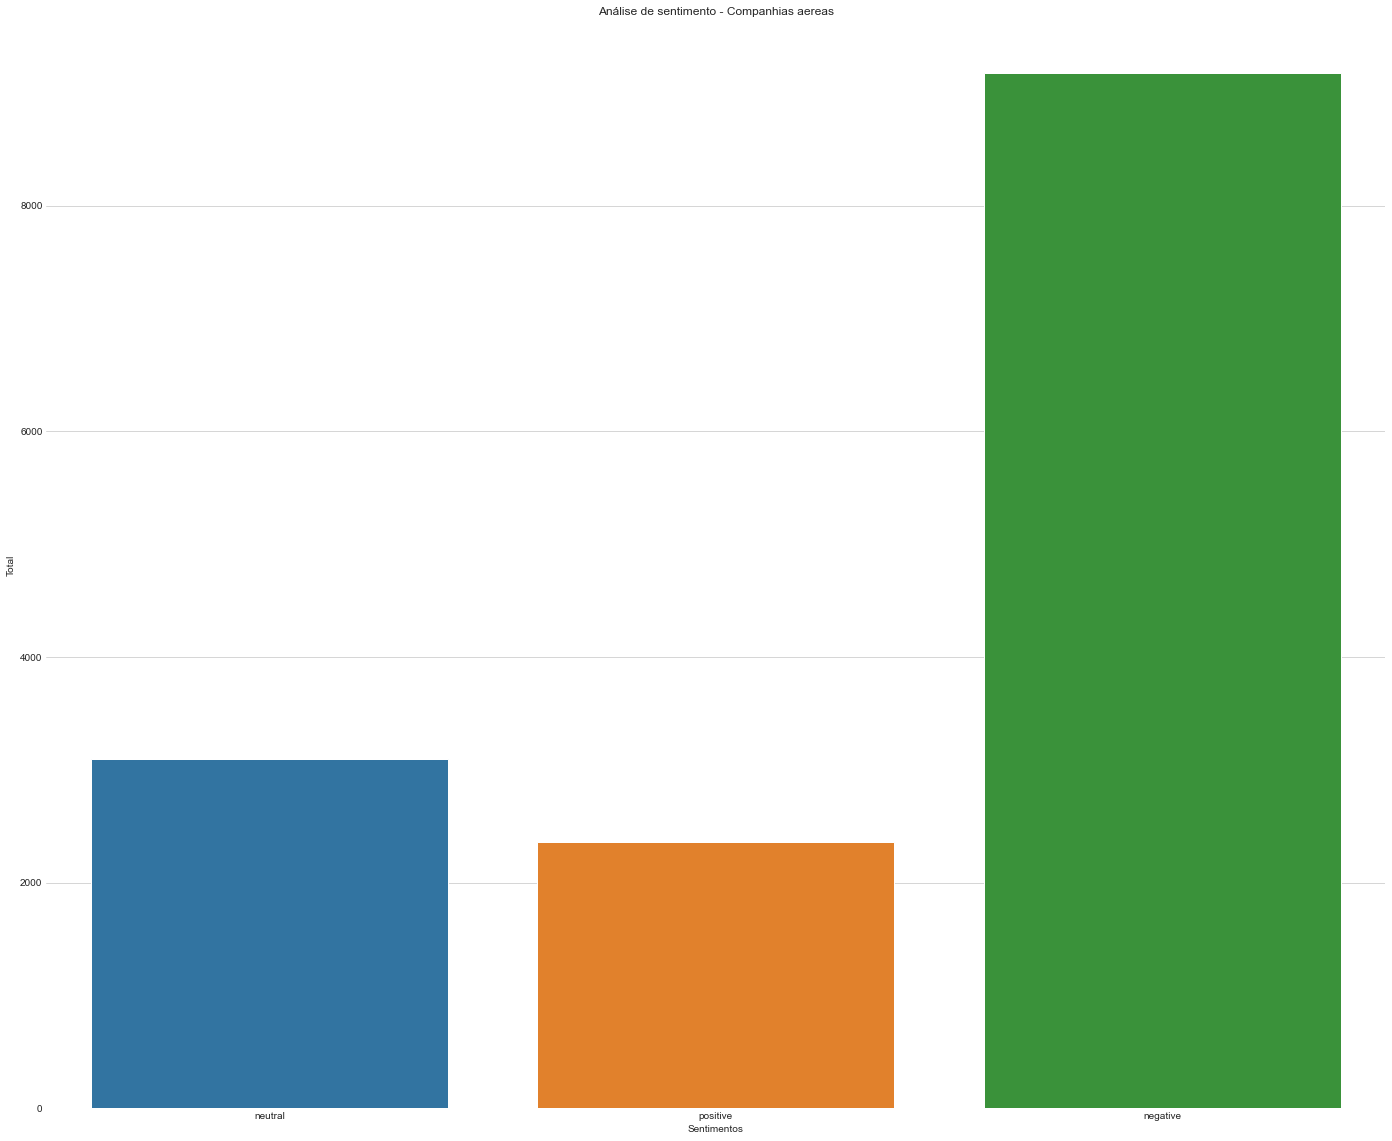

In [24]:
plt.figure(figsize=(24,20))

ax = sns.countplot(x = 'airline_sentiment', data = df)
plt.title("Análise de sentimento - Companhias aereas")
plt.xlabel("Sentimentos")
plt.ylabel("Total")

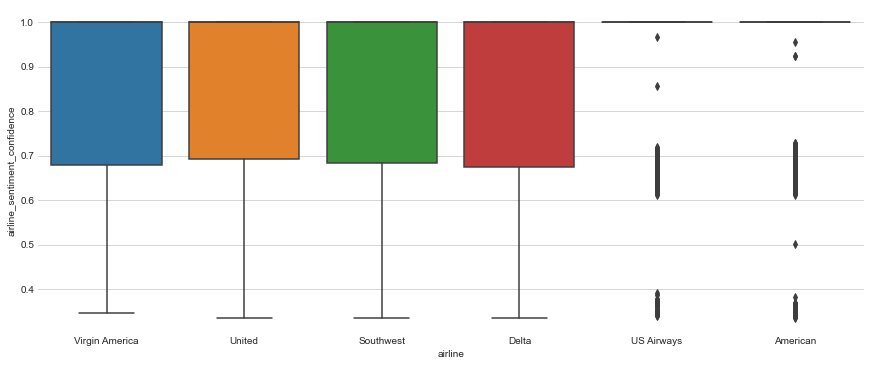

In [25]:
plt.figure(figsize=(14.8, 6))

ax = sns.boxplot(x="airline", y="airline_sentiment_confidence", data = df)

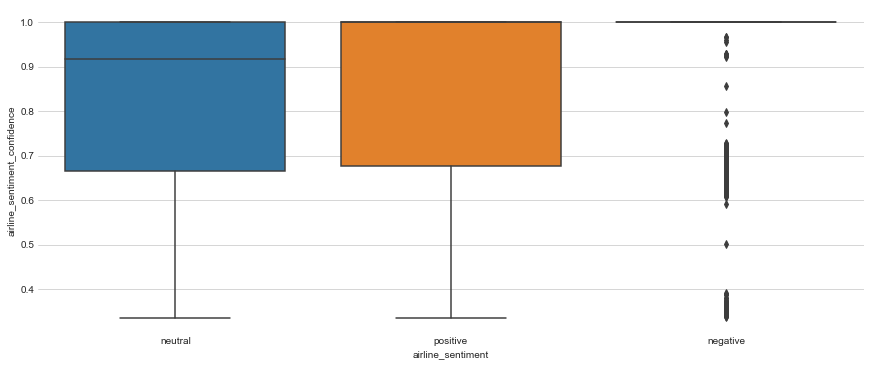

In [26]:
plt.figure(figsize=(14.8, 6))

ax = sns.boxplot(x="airline_sentiment", y="airline_sentiment_confidence", data = df)

Text(0, 0.5, 'Total')

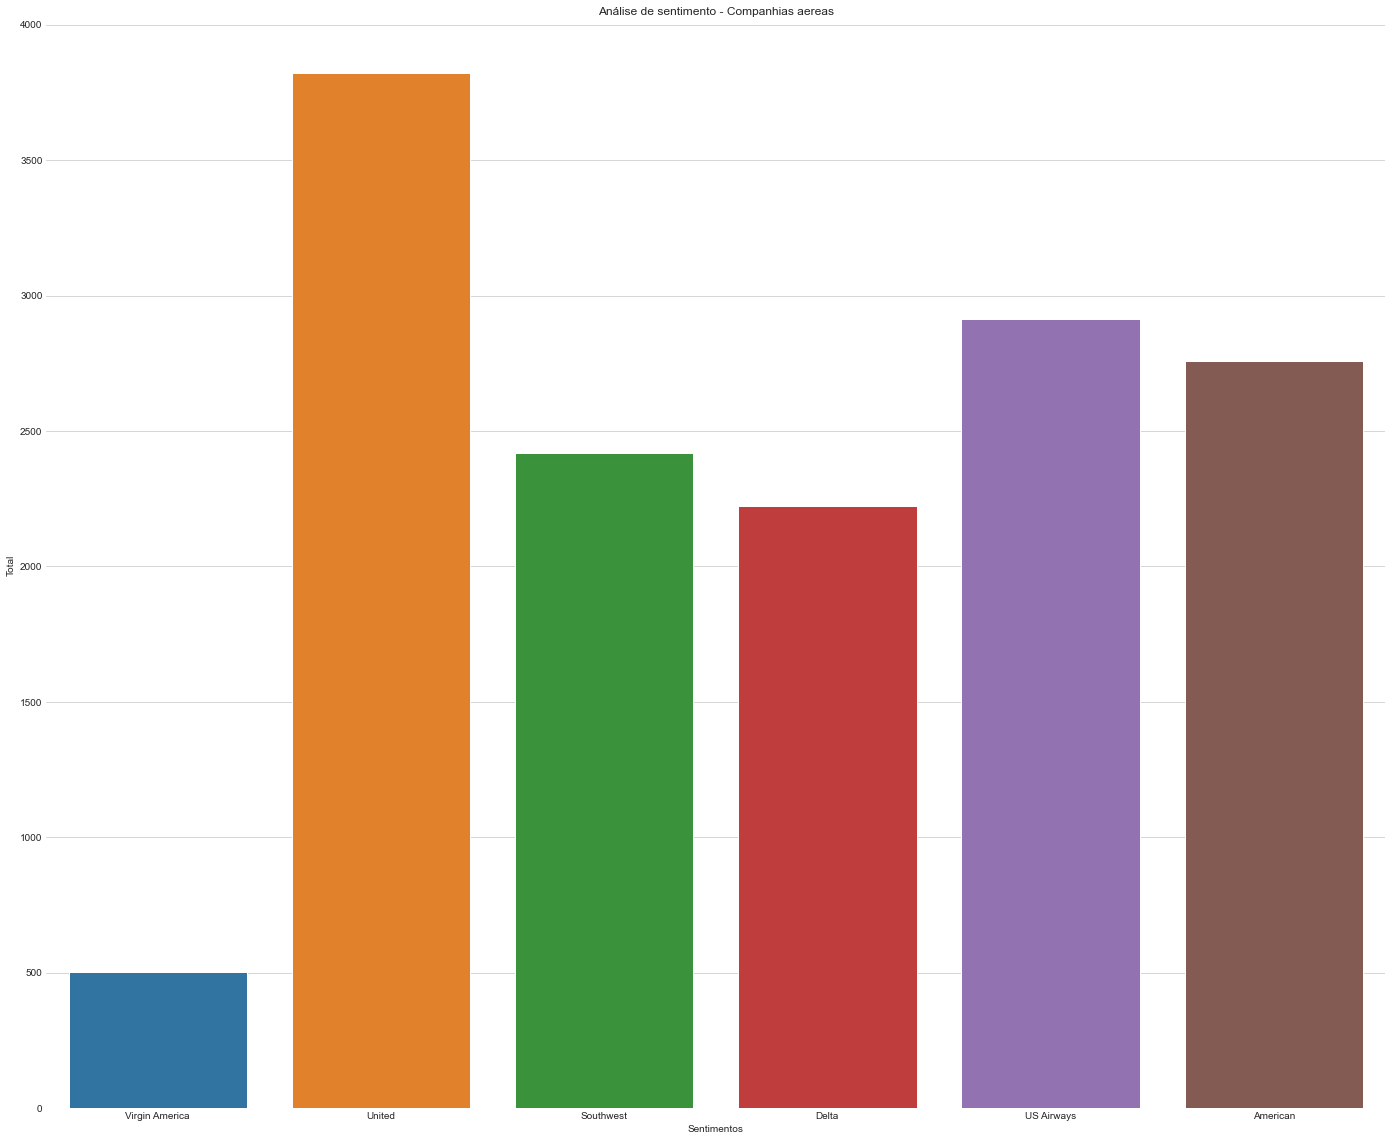

In [27]:
plt.figure(figsize=(24,20))

ax = sns.countplot(x = 'airline', data = df)
plt.title("Análise de sentimento - Companhias aereas")
plt.xlabel("Sentimentos")
plt.ylabel("Total")

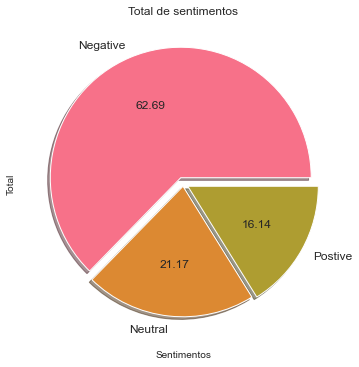

In [28]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total de sentimentos")
plt.xlabel("Sentimentos")
plt.ylabel("Total")
plt.show()

Text(0, 0.5, 'Total')

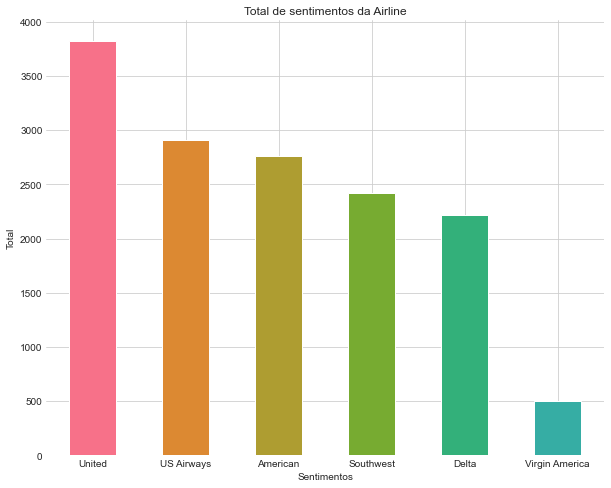

In [29]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total de sentimentos da Airline')
plt.xlabel("Sentimentos", fontsize=10)
plt.ylabel("Total", fontsize=10)

# Nuvem de palavras

In [30]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

**Nuvem de palavras de sentimentos Positivos**

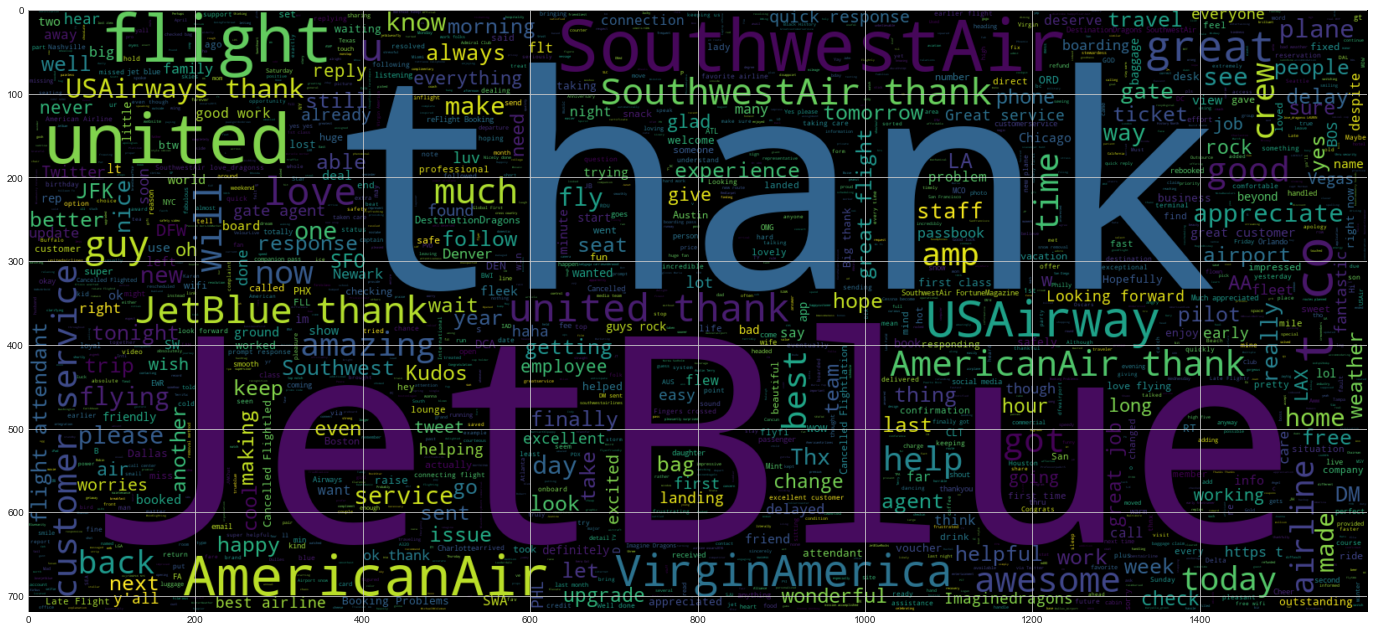

In [34]:
plt.figure(figsize=(24,20))

world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

**Nuvem de palavras de sentimentos Neutral**

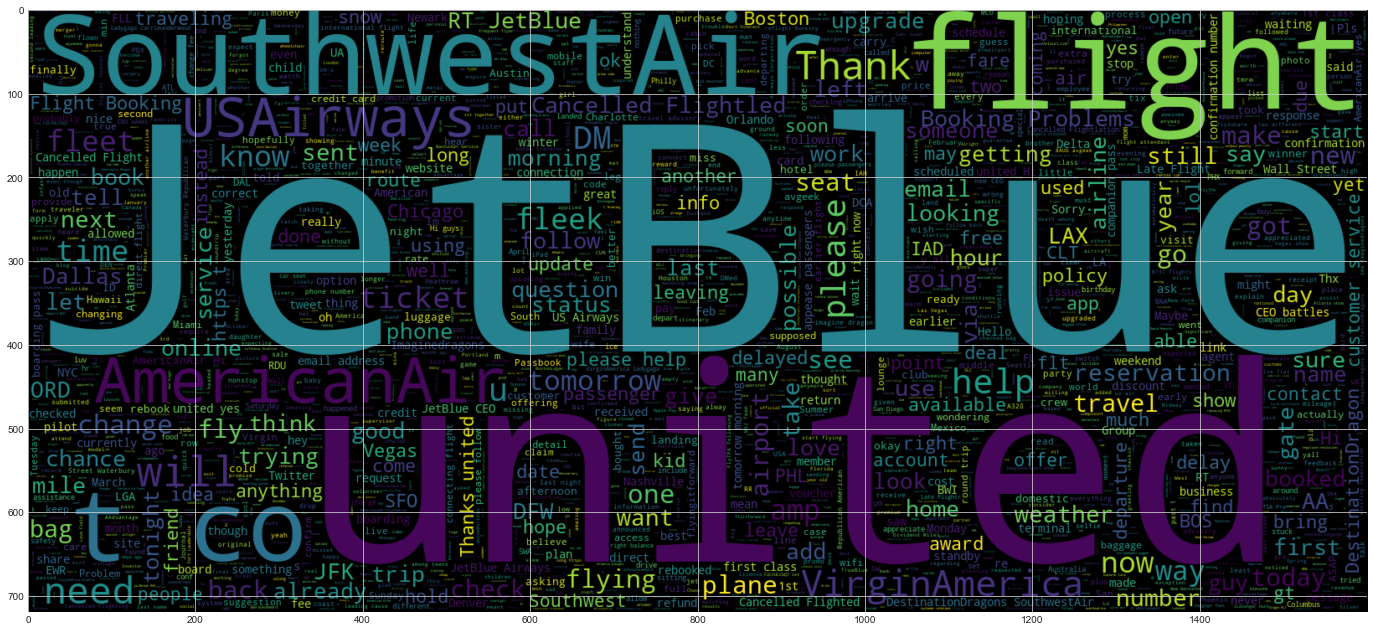

In [35]:
plt.figure(figsize=(24,12))

world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

**Nuvem de palavras de sentimentos Negative**

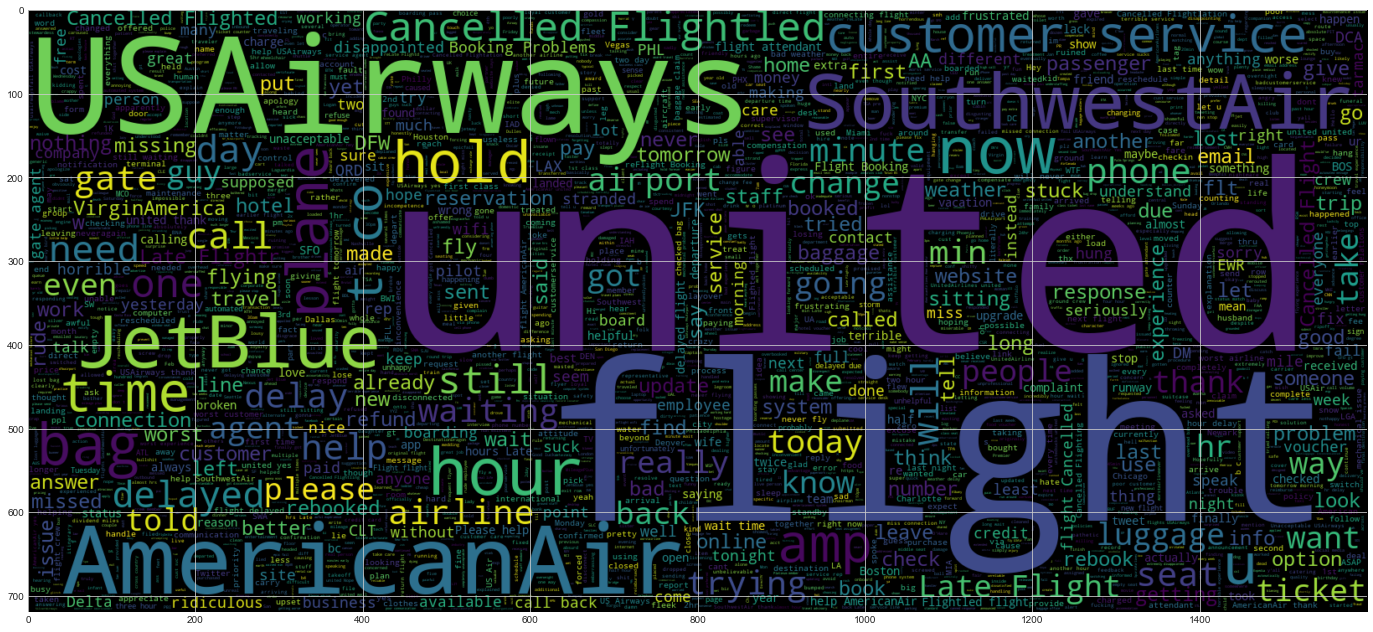

In [36]:
plt.figure(figsize = (24,12))

worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

# Pré - processamento 

In [37]:
# Criando uma função para trazer em número 0, 1, 2
def sentimento(sentimento):
    if sentimento == "positive":
        return 2
    elif sentimento == "neutral":
        return 1
    elif sentimento == "negative":
        return 0

# Aplicando a função de sentimento
df.airline_sentiment = df.airline_sentiment.apply(lambda x: sentimento(x))
print("Sentimentos:", df.airline_sentiment)

Sentimentos: 0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64


In [38]:
# Verificando review
df.airline_sentiment.count()

14640

In [39]:
# Verificando base
df.value_counts()

tweet_id            airline_sentiment  airline_sentiment_confidence  negativereason    negativereason_confidence  airline     airline_sentiment_gold  name             negativereason_gold  retweet_count  text                                                                                                              tweet_coord                  tweet_created              tweet_location  user_timezone             
567778009013178368  0                  1.0000                        Cancelled Flight  1.0000                     United      negative                realmikesmith    Cancelled Flight     0              @united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?  [26.37852293, -81.78472152]  2015-02-17 12:10:00 -0800  Chicago         Eastern Time (US & Canada)    1
569887533267611648  0                  0.8563                        Late Flight       0.5938                     US Airways  negative                ConstanceSCHE

In [111]:
# Dados de limpeza para modelo PLN

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Removendo as stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Removendo url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Removendo punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Removendo html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Removendo @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Removendo emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Texto de descontração
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Alfanumérico separado
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

# Removendo char
def cont_rep_char(text):
    tchr = text.group(0)
    if len(tchr) > 1:
        return tchr[0:2] 

# Removendo char
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

# Removendo char
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# Pré - processamento
def Preprocessing(inst):
    inst = re.sub(r"http\S+", "", inst).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

# Combinar motivo negativo com tweet (se existir)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 

# Aplicar funções em tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

# Treino e Teste

- Treino e teste da base de dados da coluna Review, sentimento

In [41]:
# Variável para treino
treino = df["final_text"]
teste = df["airline_sentiment"]

In [42]:
# Total de linhas e colunas dados variável x
treino.shape

(14640,)

In [43]:
# Total de linhas e colunas dados variável y
teste.shape

(14640,)

# TFIDF - tweets

In [44]:
# Word tokenize - E o processo de devidir uma string, textos e uma lista tokens 
# Modelo criado para classificar tweets positivos, negativos

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

model_tf = TweetTokenizer()
model_tf_vect = CountVectorizer(analyzer="word", tokenizer = model_tf.tokenize)
model_tf = model_tf_vect.fit(treino)

In [45]:
# Tweet Tokenizer pré-processamento
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

text = "Hoje passei no concurso eng da computação, mais teve muita gente para concurso"
word_tokenize(text)


tokenizer = TweetTokenizer()
tokenizer.tokenize(text)

['Hoje',
 'passei',
 'no',
 'concurso',
 'eng',
 'da',
 'computação',
 ',',
 'mais',
 'teve',
 'muita',
 'gente',
 'para',
 'concurso']

# Count Vectorizer do modelo

In [46]:
# CountVectorizer criar um vocabulário de palavras e retornar em vetor
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer="word", tokenizer = tokenizer.tokenize)
freq = vectorizer.fit_transform(treino)
freq.shape

(14640, 11007)

# Treino do modelo

In [47]:
from sklearn.model_selection import train_test_split # Split Data 
X_train , X_test , y_train , y_test = train_test_split(teste , freq , test_size=0.25,random_state=3)

In [48]:
# Visualizando os dados de treino x
X_train.shape

(10980,)

In [49]:
# Visualizando os dados de treino y 
y_train.shape

(10980, 11007)

In [50]:
# Visualizando os dados de teste x
X_test.shape

(3660,)

In [51]:
# Visualizando os dados de teste y
y_test.shape

(3660, 11007)

# Modelo machine learning
- Modelo 01 - Naive bayes

In [52]:
# Importação da biblioteca sklearn o modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(freq, teste)

# Score do modelo
model_naive_bayes_score = model_naive_bayes.score(freq, teste)

print("Score - Modelo Naive bayes multinomialNB: %.2f" % (model_naive_bayes_score * 100))

Score - Modelo Naive bayes multinomialNB: 89.33


In [53]:
# Previsão do modelo - Naive Bayes

model_naive_bayes_pred = model_naive_bayes.predict(freq)
model_naive_bayes_pred

array([0, 2, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
# Accuracy do modelo

from sklearn.metrics import accuracy_score
accuracy_naive_bayes_multinomialNB = accuracy_score(teste, model_naive_bayes_pred)
print("Accuracy - Naive bayes multinomialNB: %.2f" % (accuracy_naive_bayes_multinomialNB * 100))

Accuracy - Naive bayes multinomialNB: 89.33


In [60]:
# Classification report do modelo
from sklearn.metrics import classification_report

classification = classification_report(teste, model_naive_bayes_pred)
print("Modelo 01 - Naive bayes multinomialNB")
print()
print(classification)

Modelo 01 - Naive bayes multinomialNB

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9178
           1       0.92      0.66      0.77      3099
           2       0.91      0.80      0.85      2363

    accuracy                           0.89     14640
   macro avg       0.90      0.82      0.85     14640
weighted avg       0.90      0.89      0.89     14640



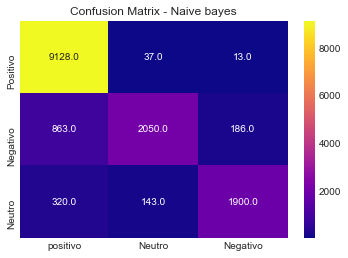

<Figure size 3636x1440 with 0 Axes>

In [58]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

matrix_confusion_1 = confusion_matrix(teste, model_naive_bayes_pred)

ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 
plt.figure(figsize=(50.5, 20))
ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["positivo", "Neutro", "Negativo",]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo', 'Neutro']);

# Modelo 02 - Decision Tree

In [64]:
%%time

# Modelo machine learning - 2

# Importação da biblioteca sklearn o modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Nome do algoritmo M.L
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Treinamento do modelo
model_dtc_fit = model_dtc.fit(freq, teste)

# Score do modelo
model_dtc_score = model_dtc.score(freq, teste)
print("Modelo - Decision Tree Classifier: %.2f" % (model_dtc_score * 100))

Modelo - Decision Tree Classifier: 78.93
Wall time: 165 ms


In [65]:
# Previsão do modelo 
modelo_arvore_cla_1_predict = model_dtc.predict(freq)
modelo_arvore_cla_1_predict

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [66]:
# Probabilidade do modelo
modelo_arvore_cla_1_prob = model_dtc.predict_proba(freq)
modelo_arvore_cla_1_prob

array([[3.12298083e-02, 5.39306483e-01, 4.29463709e-01],
       [3.12298083e-02, 5.39306483e-01, 4.29463709e-01],
       [3.12298083e-02, 5.39306483e-01, 4.29463709e-01],
       ...,
       [3.12298083e-02, 5.39306483e-01, 4.29463709e-01],
       [9.99313423e-01, 0.00000000e+00, 6.86577412e-04],
       [9.22182469e-01, 5.00894454e-02, 2.77280859e-02]])

In [68]:
# Accuracy score
acuracia_decision_tree = accuracy_score(teste, modelo_arvore_cla_1_predict)

print("Accuracy - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Accuracy - Decision Tree: 78.93


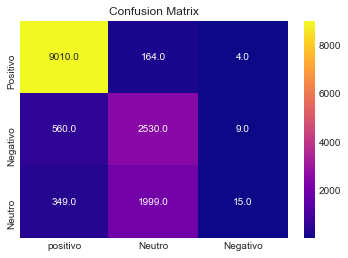

In [70]:
# Confusion matrix
matrix_confusion_2 = confusion_matrix(teste, modelo_arvore_cla_1_predict)

ax= plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["positivo", "Neutro", "Negativo",]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo', 'Neutro']);

In [71]:
# Classification report
class_report = classification_report(teste, modelo_arvore_cla_1_predict)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9178
           1       0.54      0.82      0.65      3099
           2       0.54      0.01      0.01      2363

    accuracy                           0.79     14640
   macro avg       0.66      0.60      0.54     14640
weighted avg       0.77      0.79      0.73     14640



# Modelo 03 - Regressão logistica

In [73]:
%%time

# Importação da biblioteca sklearn o modelo Logistic Regression
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_regression_logistic = LogisticRegression()

# Treinamento do modelo
model_regression_logistic_fit = model_regression_logistic.fit(freq, teste)

# Score do modelo
model_regression_logistic_score = model_regression_logistic.score(freq, teste)
print("Modelo - Regressão logistica: %.2f" % (model_regression_logistic_score * 100))

Modelo - Regressão logistica: 97.83
Wall time: 959 ms


In [74]:
# Previsão do modelo
model_regression_logistic_pred = model_regression_logistic.predict(freq)
model_regression_logistic_pred

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [75]:
# Previsão do modelo com função probabilidade 
model_regression_logistic_pred = model_regression_logistic.predict(freq)
model_regression_logistic_pred

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [76]:
# Accuracy score
acuracia_Logistic_Regression = accuracy_score(teste, model_regression_logistic_pred)

print("Accuracy - Decision Tree: %.2f" % (acuracia_Logistic_Regression * 100))

Accuracy - Decision Tree: 97.83


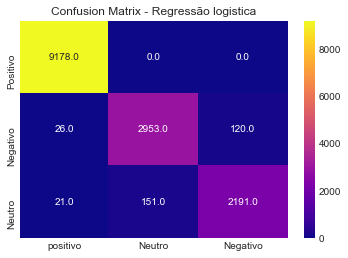

In [78]:
# Confusion matrix
matrix_confusion_3 = confusion_matrix(teste, model_regression_logistic_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 
ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Regressão logistica');  
ax.xaxis.set_ticklabels(["positivo", "Neutro", "Negativo",]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo', 'Neutro']);

In [79]:
# Classification report

classification = classification_report(teste, model_regression_logistic_pred)
print("Modelo 03 - Regressão logistica")
print()
print(classification)

Modelo 03 - Regressão logistica

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9178
           1       0.95      0.95      0.95      3099
           2       0.95      0.93      0.94      2363

    accuracy                           0.98     14640
   macro avg       0.96      0.96      0.96     14640
weighted avg       0.98      0.98      0.98     14640



# Modelo 04 - XGBOOST

In [80]:
# Modelo 06 - XGBosst 

# Importação da biblioteca sklearn o modelo XGBoost
from xgboost import XGBClassifier

# Nome do algoritmo M.L
xgb = XGBClassifier()

# Treinamento do modelo
xgb_fit = xgb.fit(freq, teste)

# Score do modelo
xgb_score = xgb.score(freq, teste)
print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

[14:57:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo - XGBoost: 95.14


In [81]:
# Previsão do modelo

xgb_pred = xgb.predict(freq)
xgb_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [82]:
# Accuracy score do modelo

accuracy_XGBoost = accuracy_score(teste, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 95.14


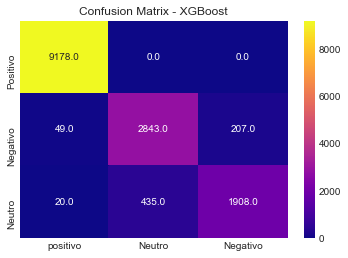

In [86]:
# Confusion matrix
matrix_confusion_4 = confusion_matrix(teste, xgb_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 
ax.set_xlabel('');
ax.set_ylabel(''); 

ax.set_title('Confusion Matrix - XGBoost')
ax.xaxis.set_ticklabels(["positivo", "Neutro", "Negativo",]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo', 'Neutro']);

In [139]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica", 
                "Decision Tree",
                "Naive Bayes",
                "XGBoost"],

    "Acurácia" :[accuracy_naive_bayes_multinomialNB, 
                      acuracia_decision_tree, 
                      acuracia_Logistic_Regression, 
                      accuracy_XGBoost]})

modelos_1 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_1.to_csv("modelos_1.csv")
modelos_1

,Models,Acurácia
2,Naive Bayes,0.978279
3,XGBoost,0.951434
0,Regressão logistica,0.893306
1,Decision Tree,0.789276


In [89]:
## Salvando modelo M.L PLN

import pickle
 
with open('model_naive_bayes_pred.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes_pred, file)

with open('modelo_arvore_cla_1_predict.pkl', 'wb') as file:
    pickle.dump(modelo_arvore_cla_1_predict, file)

with open('model_regression_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_regression_logistic_pred, file)

with open('xgb_pred.pkl', 'wb') as file:
    pickle.dump(xgb_pred, file)

# Machine learning - Pipeline

- Modelo 01 - Naive Bayes

In [93]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline

pipeline = Pipeline([  # Pipeline 1
    ("counts", CountVectorizer()), # CountVectorizer treinamneto
    ("classifier", MultinomialNB()) # Modelo naive bayes classificação
])
pipeline

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [94]:
# Previsão 
result_pipeline = cross_val_predict(pipeline, treino, teste, cv = 10)
result_pipeline

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
# Accuracy score do modelo

pipeline_NB = accuracy_score(teste, result_pipeline)
print("Accuracy - Naive bayes: %.2f" % (pipeline_NB * 100))

Accuracy - Naive bayes: 81.56


In [106]:
# Classification report

classification = classification_report(teste, result_pipeline)
print("Pipeline Naive bayes")
print()
print(classification)

Pipeline Naive bayes

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      9178
           1       0.80      0.44      0.57      3099
           2       0.83      0.63      0.72      2363

    accuracy                           0.82     14640
   macro avg       0.82      0.69      0.73     14640
weighted avg       0.81      0.82      0.80     14640



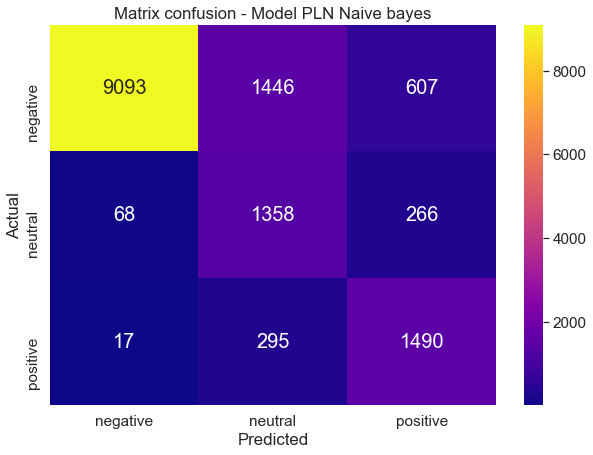

In [103]:
# Confusion matrix
matrix = confusion_matrix(result_pipeline, teste)

x = ["negative", "neutral", "positive"]
y = ['negative', "neutral", "positive"]

matrix = pd.DataFrame(matrix, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Model PLN Naive bayes")
matrix = sns.heatmap(matrix, cmap = 'plasma', annot=True, annot_kws = {"size": 20}, fmt = "")

# Machine learning - Pipeline

- Modelo 02 - XGBosst

In [123]:
# Pipeline XGBosst Classifier

pipeline_2 = Pipeline([
    ("counts", CountVectorizer()),
    ("classifier", XGBClassifier())
])
pipeline_2

Pipeline(steps=[('counts', CountVectorizer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categorical=False,
                               gamma=None, gpu_id=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None,
                               reg_alpha=None, reg_lambda=None,
                               scale_pos_weight=None, subsample=None,
                               tree_method=None, validate_parame

In [125]:
result_pipeline_2 = cross_val_predict(pipeline_2, treino, teste, cv = 10)
result_pipeline_2

[15:20:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [135]:
# Accuracy score do modelo

pipeline_XGBosst = accuracy_score(teste, result_pipeline_2)
print("Accuracy - XGBClassifier: %.2f" % (pipeline_XGBosst * 100))

Accuracy - XGBClassifier: 92.77


In [127]:
# Classification report

classification = classification_report(teste, result_pipeline_2)
print("Pipeline XGBClassifier")
print()
print(classification)

Pipeline XGBClassifier

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9178
           1       0.82      0.86      0.84      3099
           2       0.83      0.73      0.78      2363

    accuracy                           0.93     14640
   macro avg       0.88      0.87      0.87     14640
weighted avg       0.93      0.93      0.93     14640



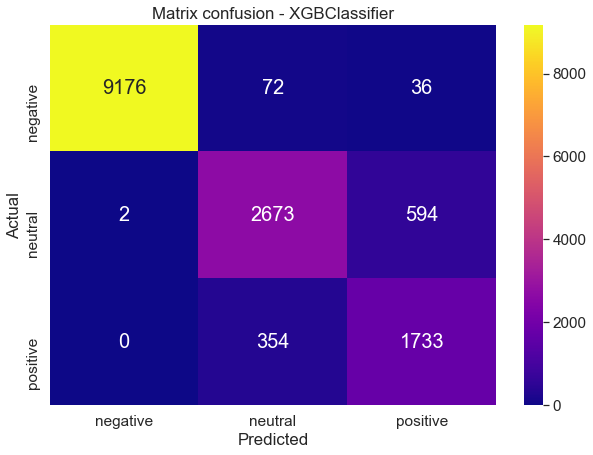

In [129]:
# Confusion matrix
matrix = confusion_matrix(result_pipeline_2, teste)

x = ["negative", "neutral", "positive"]
y = ['negative', "neutral", "positive"]

matrix = pd.DataFrame(matrix, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - XGBClassifier")
matrix = sns.heatmap(matrix, cmap = 'plasma', annot=True, annot_kws = {"size": 20}, fmt = "")

In [136]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Pipeline 1: Naive bayes", 
               "Pipeline 2: XGBosst"],

    "Acurácia" :[pipeline_NB,
                 pipeline_XGBosst]})

modelos_2 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_2.to_csv("modelos_2.csv")
modelos_2

,Models,Acurácia
0,Pipeline 1: Naive bayes,0.927732
1,Pipeline 2: XGBosst,0.927732


In [137]:
# Salvando pipeline Machine learning

import pickle    
    
with open('result_pipeline.pkl', 'wb') as file:
    pickle.dump(result_pipeline, file)
    
with open('result_pipeline_2.pkl', 'wb') as file:
    pickle.dump(result_pipeline_2, file)

In [140]:
print("Sem pipeline")
print(modelos_1)
print("\n")

print("Com pipeline")
print(modelos_2)

Sem pipeline
                Models  Acurácia
2          Naive Bayes  0.978279
3              XGBoost  0.951434
0  Regressão logistica  0.893306
1        Decision Tree  0.789276


Com pipeline
                    Models  Acurácia
0  Pipeline 1: Naive bayes  0.927732
1      Pipeline 2: XGBosst  0.927732
